# <span style="color:royalblue"> [5주차] 2024 데이터 마트 만들기</span> 
# 2024 부동산 매매가격 예측 모델링을 위한 데이터 전처리

--- 

<div style="text-align: right"> Final Edition : 2024.8.18<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

## [1주차] 부동산 시장 Domain Knowledge 습득_read_csv, melt, split, replace

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_price = pd.read_csv("data/주택매매가격지수_시도_시_군_구__20240712231149.csv", encoding="cp949")#utf-8
df_price

,행정구역별,2003.11,2003.12,2004.01,2004.02,2004.03,2004.04,2004.05,2004.06,2004.07,...,2023.08,2023.09,2023.10,2023.11,2023.12,2024.01,2024.02,2024.03,2024.04,2024.05
0,전국,61.5,61.0,60.7,60.7,60.8,60.9,60.9,60.8,60.6,...,95.8,96.0,96.2,96.3,96.2,96.0,95.9,95.8,95.7,95.7
1,서울특별시,55.6,55.2,55.1,55.3,55.5,55.7,55.7,55.6,55.4,...,96.2,96.5,96.7,96.8,96.7,96.6,96.5,96.5,96.6,96.8
2,부산광역시,66.4,65.7,65.2,65.1,65.1,65.1,65.0,64.7,64.3,...,93.8,93.7,93.6,93.4,93.1,92.9,92.6,92.4,92.2,92.1
3,대구광역시,58.2,57.5,57.0,57.0,57.1,57.1,57.0,56.9,56.8,...,85.9,86.0,86.1,86.1,85.9,85.6,85.2,84.9,84.7,84.5
4,인천광역시,55.9,55.4,55.0,55.0,54.9,54.9,54.8,54.6,54.6,...,94.4,94.6,94.7,94.5,94.2,94.0,93.9,93.9,93.8,93.9
5,광주광역시,61.9,61.5,61.3,61.2,61.3,61.4,61.3,61.3,61.4,...,97.2,97.2,97.3,97.4,97.4,97.3,97.2,97.1,97.0,97.0
6,대전광역시,59.6,58.7,58.7,59.1,59.3,59.5,60.0,60.2,60.4,...,92.7,93.0,93.2,93.4,93.4,93.4,93.3,93.2,93.1,93.0
7,울산광역시,56.7,56.3,55.9,56.1,56.3,56.3,56.7,56.7,56.8,...,93.4,93.5,93.7,93.7,93.7,93.6,93.6,93.5,93.5,93.4
8,세종특별자치시,-,-,-,-,-,-,-,-,-,...,79.9,80.2,80.3,80.3,80.1,79.8,79.1,78.2,77.6,76.9
9,경기도,56.4,56.0,55.7,55.7,55.9,56.0,55.9,55.6,55.3,...,94.3,94.8,95.2,95.3,95.2,95.0,94.8,94.6,94.5,94.4


In [4]:
df = df_price.melt(id_vars="행정구역별")
df.shape

(4446, 3)

In [5]:
df

,행정구역별,variable,value
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
...,...,...,...
4441,전라북도,2024.05,101.3
4442,전라남도,2024.05,98.7
4443,경상북도,2024.05,100.8
4444,경상남도,2024.05,96.8


In [6]:
df.columns = ["지역", "기간", "주택매매가격지수"]
df.head()

,지역,기간,주택매매가격지수
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9


In [7]:
df.columns

Index(['지역', '기간', '주택매매가격지수'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        4446 non-null   object
 1   기간        4446 non-null   object
 2   주택매매가격지수  4446 non-null   object
dtypes: object(3)
memory usage: 104.3+ KB


In [9]:
df["연도"] = df["기간"].str.split(".",expand=True)[0] # expand = True 는 DataFrame 생성. False는 Series 생성(list로 생성 인덱스 ok)
df["연도"]

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
4441    2024
4442    2024
4443    2024
4444    2024
4445    2024
Name: 연도, Length: 4446, dtype: object

In [10]:
df["월"] = df["기간"].str.split(".", expand=True)[1]
df["월"]

0       11
1       11
2       11
3       11
4       11
        ..
4441    05
4442    05
4443    05
4444    05
4445    05
Name: 월, Length: 4446, dtype: object

In [11]:
#  아파트 매매가격지수 칼럼의 "0"(세종시), -" 하이픈을  NaN(Not a number)로 대체

In [12]:
df["주택매매가격지수"] = df["주택매매가격지수"].replace("0", np.nan)
df["주택매매가격지수"] = df["주택매매가격지수"].replace("-", np.nan)

In [13]:
df["주택매매가격지수"] = pd.to_numeric(df["주택매매가격지수"])

In [14]:
df_nation = df[df["지역"].isin(["전국"])]
df_nation.head()

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
18,전국,2003.12,61.0,2003,12
36,전국,2004.01,60.7,2004,01
54,전국,2004.02,60.7,2004,02
72,전국,2004.03,60.8,2004,03


In [15]:
df_nation.shape

(247, 5)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="NanumGothic")

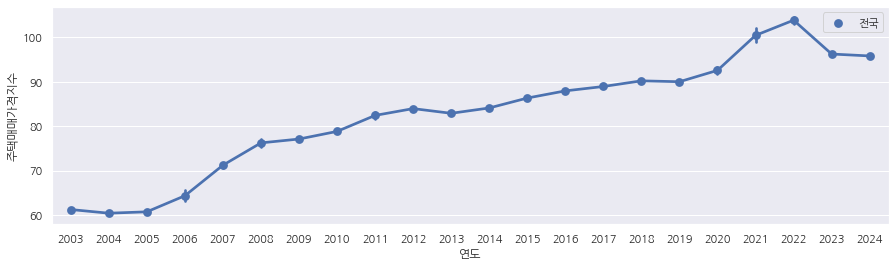

In [17]:
# 그래프 사이즈 변경하기 (가로, 세로)
plt.figure(figsize=(15, 4))

#  hue 인수에 카테고리 변수 이름을 지정하면, 카테고리 값에 따라 색상 변경
sns.pointplot(data=df_nation, x="연도", y="주택매매가격지수", hue="지역")

# 레전드 "* 전국" 위치를 고정
plt.legend(bbox_to_anchor=(1, 1))

## [2주차] 미국과 한국 주택가격지수_merge, dropna, pd.to_datetime, astype(np.float64)

In [18]:
from datetime import datetime, timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute

In [20]:
# House_Price_Index_US
import pandas as pd
df_us = pd.read_csv('data/USSTHPI_202407.csv')
df_us

,DATE,USSTHPI
0,1975-01-01,59.93
1,1975-04-01,60.79
2,1975-07-01,61.21
3,1975-10-01,62.26
4,1976-01-01,62.87
...,...,...
192,2023-01-01,625.42
193,2023-04-01,644.84
194,2023-07-01,656.96
195,2023-10-01,657.70


In [21]:
df_us['DATE']= pd.to_datetime(df_us['DATE'])

<AxesSubplot: xlabel='DATE'>

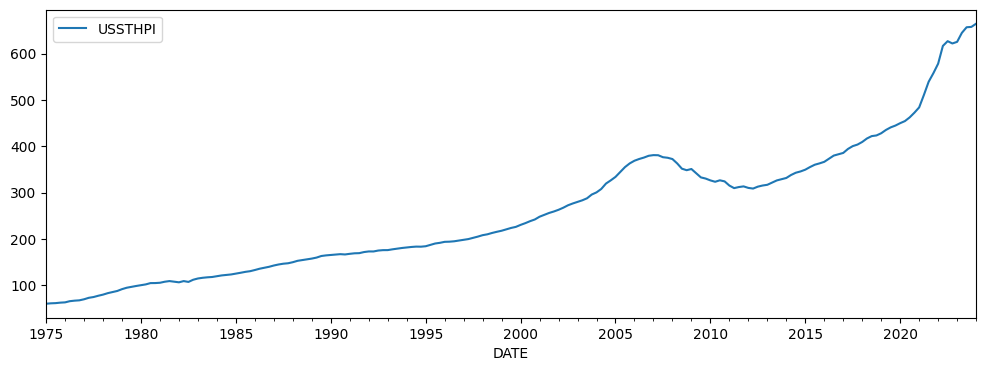

In [22]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('figure', figsize=(12, 4))
df_us.plot('DATE', 'USSTHPI')

In [23]:
# 대한민국 공동주택 통합 매매 실거래 가격지수

In [24]:
df_kr = pd.read_csv('./data/공동주택_통합_매매_실거래가격지수_20240719235749.csv', encoding='cp949')
df_kr

,시점,전국
0,시점,지수 (2017.11 = 100.0)
1,2006.01,58.2
2,2006.02,58.6
3,2006.03,59.3
4,2006.04,59.7
...,...,...
216,2023.12,120.5
217,2024.01,121.0
218,2024.02,120.9
219,2024.03,121.2


In [25]:
# 1번째 행부터 끝행 까지 데이터를 추출
df_kr = df_kr[1::]

In [27]:
# 문자열인 시점 데이터 시리즈를 datetime으로 변환
pd.to_datetime(df_kr['시점'])#, format='ISO8601')

1     2006-01-01
2     2006-02-01
3     2006-03-01
4     2006-04-01
5     2006-05-01
         ...    
216   2023-12-01
217   2024-01-01
218   2024-02-01
219   2024-03-01
220   2024-04-01
Name: 시점, Length: 220, dtype: datetime64[ns]

In [28]:
import warnings
warnings.filterwarnings("ignore")

df_us['Time'] = pd.to_datetime(df_us['DATE'])
df_kr['Time'] = pd.to_datetime(df_kr['시점'])

# pd.merge_asof

In [29]:
df_merged = pd.merge_asof(
    df_us.sort_values(by='Time'), df_kr.sort_values(by='Time'),
    on='Time', direction='nearest')

In [30]:
df_merged 

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,59.93,1975-01-01,2006.01,58.2
1,1975-04-01,60.79,1975-04-01,2006.01,58.2
2,1975-07-01,61.21,1975-07-01,2006.01,58.2
3,1975-10-01,62.26,1975-10-01,2006.01,58.2
4,1976-01-01,62.87,1976-01-01,2006.01,58.2
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


In [31]:
df_merged = pd.merge_asof(
    df_us.sort_values(by='Time'), df_kr.sort_values(by='Time'),
    on='Time', allow_exact_matches=True)

In [32]:
df_merged 

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,59.93,1975-01-01,NaN,NaN
1,1975-04-01,60.79,1975-04-01,NaN,NaN
2,1975-07-01,61.21,1975-07-01,NaN,NaN
3,1975-10-01,62.26,1975-10-01,NaN,NaN
4,1976-01-01,62.87,1976-01-01,NaN,NaN
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


In [33]:
df_merged.isnull().sum()

DATE         0
USSTHPI      0
Time         0
시점         124
전국         124
dtype: int64

In [34]:
df_merged.dropna(axis=0)

,DATE,USSTHPI,Time,시점,전국
124,2006-01-01,368.73,2006-01-01,2006.01,58.2
125,2006-04-01,372.50,2006-04-01,2006.04,59.7
126,2006-07-01,375.56,2006-07-01,2006.07,61.0
127,2006-10-01,379.42,2006-10-01,2006.10,66.0
128,2007-01-01,380.83,2007-01-01,2007.01,70.9
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


In [35]:
df_merged['전국'] = df_merged['전국'].astype(np.float64)

In [36]:
df = df_merged[["Time", "USSTHPI", "전국"]]
df

,Time,USSTHPI,전국
0,1975-01-01,59.93,NaN
1,1975-04-01,60.79,NaN
2,1975-07-01,61.21,NaN
3,1975-10-01,62.26,NaN
4,1976-01-01,62.87,NaN
...,...,...,...
192,2023-01-01,625.42,117.1
193,2023-04-01,644.84,119.7
194,2023-07-01,656.96,121.7
195,2023-10-01,657.70,122.6


In [37]:
df.columns = ["Time", "US", "KR"]
df

,Time,US,KR
0,1975-01-01,59.93,NaN
1,1975-04-01,60.79,NaN
2,1975-07-01,61.21,NaN
3,1975-10-01,62.26,NaN
4,1976-01-01,62.87,NaN
...,...,...,...
192,2023-01-01,625.42,117.1
193,2023-04-01,644.84,119.7
194,2023-07-01,656.96,121.7
195,2023-10-01,657.70,122.6


In [38]:
df = df.dropna()

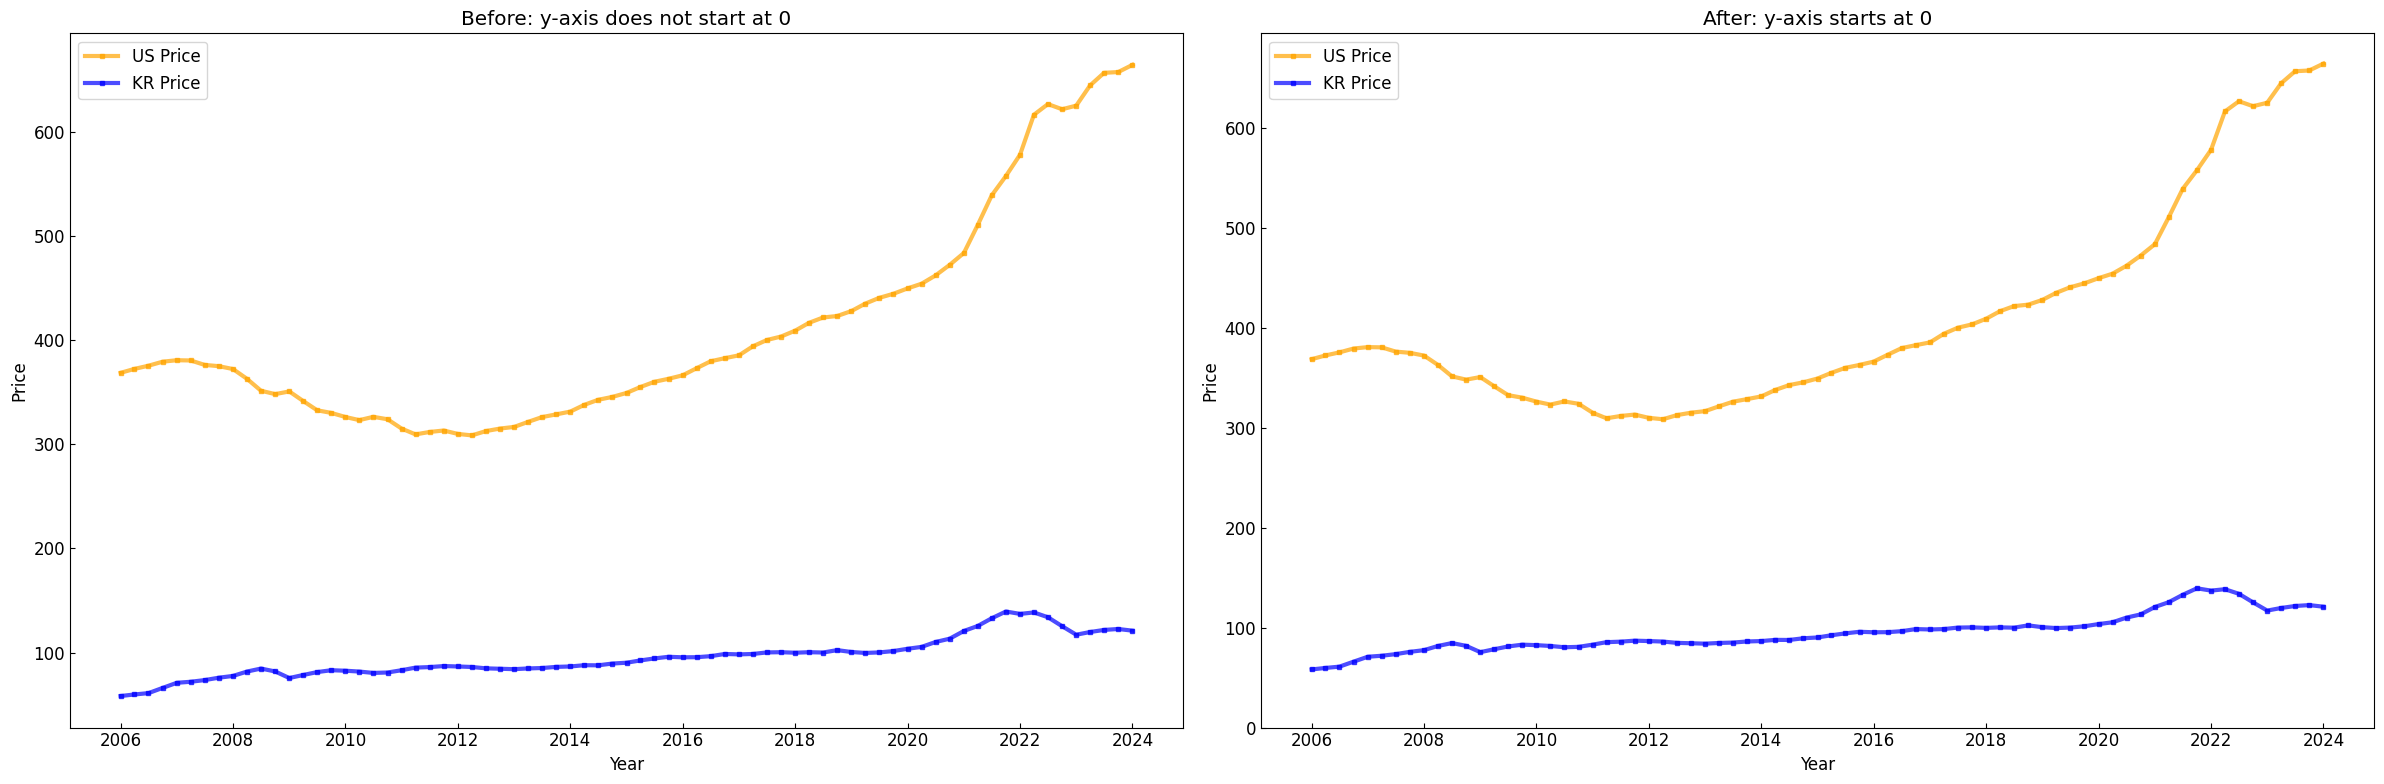

In [39]:
import matplotlib.pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (24, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df.Time.to_numpy()
y1 = df.US.to_numpy()
y2 = df.KR.to_numpy()

# 3. 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2)

# 첫 번째 그래프: y축 시작이 0이 아닌 경우
ax1.plot(x, y1, '-s', color='orange', markersize=3, linewidth=3, alpha=0.7, label='US Price')
ax1.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.tick_params(axis='both', direction='in')
ax1.legend(loc='upper left')
ax1.set_title('Before: y-axis does not start at 0')

# 두 번째 그래프: y축 시작이 0인 경우
ax2.plot(x, y1, '-s', color='orange', markersize=3, linewidth=3, alpha=0.7, label='US Price')
ax2.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price')
ax2.tick_params(axis='both', direction='in')
ax2.set_ylim(bottom=0)  # y축의 시작을 0으로 설정
ax2.legend(loc='upper left')
ax2.set_title('After: y-axis starts at 0')

plt.tight_layout()
plt.show()


In [41]:
# 시점의 통일 배웠었죠?

In [40]:
base_point_KR = df_merged['전국'][df_merged['DATE']=='2017-07-01']
base_point_US = np.float32(df_merged['USSTHPI'][df_merged['DATE']=='2017-07-01'])

df_merged['USSTHP(2017.7=100)'] = df_merged['USSTHPI'] / base_point_US * 100
df_merged.dropna(inplace=True)

In [41]:
df_merged

,DATE,USSTHPI,Time,시점,전국,USSTHP(2017.7=100)
124,2006-01-01,368.73,2006-01-01,2006.01,58.2,92.124922
125,2006-04-01,372.50,2006-04-01,2006.04,59.7,93.066833
126,2006-07-01,375.56,2006-07-01,2006.07,61.0,93.831355
127,2006-10-01,379.42,2006-10-01,2006.10,66.0,94.795753
128,2007-01-01,380.83,2007-01-01,2007.01,70.9,95.148032
...,...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1,156.257339
193,2023-04-01,644.84,2023-04-01,2023.04,119.7,161.109307
194,2023-07-01,656.96,2023-07-01,2023.07,121.7,164.137414
195,2023-10-01,657.70,2023-10-01,2023.10,122.6,164.322299


In [43]:
df_new = df_merged[["Time", "USSTHP(2017.7=100)", "전국"]]
df_new.columns = ["Time", "US", "KR"]

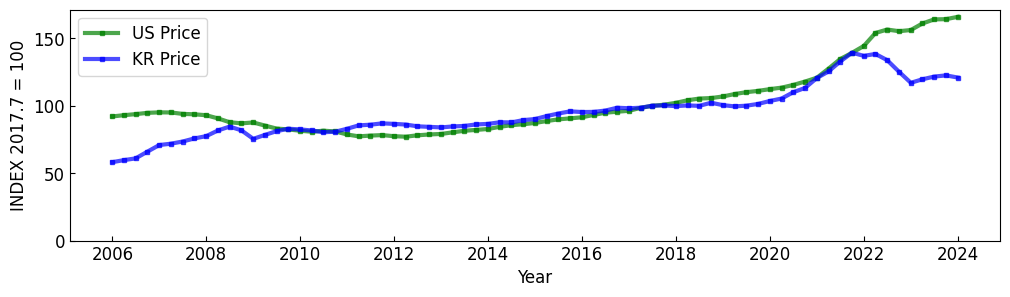

In [45]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df_new.Time.to_numpy()
y1 = df_new.US.to_numpy()
y2 = df_new.KR.to_numpy()

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(x, y1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='US Price')

# y2 : 한국 인덱스에 대한 값
ax1.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')

ax1.set_xlabel('Year')
ax1.set_ylabel('INDEX 2017.7 = 100')
ax1.tick_params(axis='both', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)
ax1.set_ylim(bottom=0)  # y축의 시작을 0으로 설정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(loc='upper left')

plt.show()

In [46]:
# 상관관계에 대해서 배웠습니다.

*  <span style="color:royalblue">피어슨</span>  <br>
  - 연속형 변수의 상관관계 측정<br>
  - 모수 검정(parametric test)<br><br>
  
*  <span style="color:royalblue">캔달</span>  <br>
  - 변수값 대신 순위로 바꿔 이용(내신등급, 학점)
  - 비모수 검정(Non-parametric test)
  - sample size가 작을때. 데이터 중 같은 값이 많을때 사용<br><br>  
    
*  <span style="color:royalblue">스피어만</span>  <br>
  - 켄달과 동일한 순위기준 상관계수
  - 비모수 검정(Non-parametric test)
  - 데이터 내 편차와 이상치에 민감. 켄달보다 높은 상관관계 수치를 보임<br><br>

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 124 to 196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    73 non-null     datetime64[ns]
 1   US      73 non-null     float64       
 2   KR      73 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.3 KB


In [47]:
df_new.index = df_new["Time"]

In [48]:
df_new = df_new[["US", "KR"]]

In [49]:
df_new

,US,KR
Time,,
2006-01-01,92.124922,58.2
2006-04-01,93.066833,59.7
2006-07-01,93.831355,61.0
2006-10-01,94.795753,66.0
2007-01-01,95.148032,70.9
...,...,...
2023-01-01,156.257339,117.1
2023-04-01,161.109307,119.7
2023-07-01,164.137414,121.7


In [50]:
df_new.corr(method='pearson', min_periods=1)

,US,KR
US,1.000000,0.826839
KR,0.826839,1.000000


## [3주차] FRED, 한국은행, 공공데이터포털_API, 최신 package/module

In [51]:
# !pip install finance-datareader

In [52]:
# M2 통화량과, 나스닥, 주택가격지수
import FinanceDataReader as fdr
import matplotlib as plt

US_all_index = fdr.DataReader('FRED:CSUSHPISA, WM2NS, USSTHPI,DFF, CORESTICKM159SFRBATL, ICSA, HSN1F, NASDAQCOM,GDP', '2010') # According to New API
US_all_index

,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
DATE,,,,,,,,,
2010-01-01,0.05,NaN,147.396,1.170764,345.0,326.25,14764.610,NaN,NaN
2010-01-02,0.05,NaN,147.396,1.170764,345.0,326.25,14764.610,NaN,456000.0
2010-01-03,0.05,NaN,147.396,1.170764,345.0,326.25,14764.610,NaN,456000.0
2010-01-04,0.12,2308.42,147.396,1.170764,345.0,326.25,14764.610,8534.2,456000.0
2010-01-05,0.12,2308.71,147.396,1.170764,345.0,326.25,14764.610,8534.2,456000.0
...,...,...,...,...,...,...,...,...,...
2024-08-11,5.33,16745.30,320.144,4.164951,617.0,664.58,28629.153,20947.5,227000.0
2024-08-12,5.33,16780.61,320.144,4.164951,617.0,664.58,28629.153,20947.5,227000.0
2024-08-13,5.33,17187.61,320.144,4.164951,617.0,664.58,28629.153,20947.5,227000.0


## [4주차] 부동산의 수요(매매가, 전세가) 와 공급(분양, 인허가 등) _def/return, read_excel, xlwings

In [53]:
from pandas import json_normalize
import requests
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker
plt.rc('font', family='NanumGothic')

# url 생성
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=13103871090T1+&objL1=ALL&objL2=13102871090B.0001+&objL3=13102871090C.0001+&objL4=13102871090D.0001+&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=200701&endPrdDe=202407&orgId=116&tblId=DT_MLTM_1948'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

In [54]:
df

,TBL_NM,ITM_NM_ENG,ITM_ID,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C2_OBJ_NM,C3_OBJ_NM,C4,C4_OBJ_NM,...,C3_OBJ_NM_ENG,DT,C3,C4_OBJ_NM_ENG,PRD_SE,C1,C1_NM,C2_NM,C3_NM,C4_NM
0,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,12038,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
1,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,29789,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
2,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,49827,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
3,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,69013,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
4,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,99606,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,1242,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4550,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,1267,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4551,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,3354,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4552,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,3363,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)


In [55]:
# 데이터정제 
df = df[['PRD_DE', 'C1_NM', 'DT']]
df = df.pivot(index='PRD_DE', columns='C1_NM', values='DT')
df= df[['전국', '수도권', '지방소계']]

In [56]:
df

C1_NM,전국,수도권,지방소계
PRD_DE,,,
200701,12038,4246,7792
200702,29789,8026,21763
200703,49827,14032,35795
200704,69013,23319,45694
200705,99606,38564,61042
...,...,...,...
202402,48722,19883,28839
202403,74558,30306,44252
202404,102482,41583,60899


In [57]:
df = df.copy()
df['수도권'] = pd.to_numeric(df['수도권'])
df['지방소계'] = pd.to_numeric(df['지방소계'])

df['수도권_월'] = np.where(df.index.str[-2:] == '01', df['수도권'], df['수도권'].diff()).astype(int)
df['지방권_월'] = np.where(df.index.str[-2:] == '01', df['지방소계'], df['지방소계'].diff()).astype(int)

df['연'] = df.index.str[:4]
df['월'] = df.index.str[-2:]

df.index = df['연'] + "-" + df['월']
df.index = pd.to_datetime(df.index)
df_per = df[['수도권_월','지방권_월']]
year_per = df_per.groupby(df_per.index.year).sum()

In [58]:
year_per

C1_NM,수도권_월,지방권_월
2007,302551,253241
2008,197580,173705
2009,255158,126629
2010,250218,136324
2011,272156,277438
2012,269290,317594
2013,192610,247506
2014,241889,273362
2015,408773,356555
2016,341162,384886


In [59]:
def presale_preprocessing(url):

    contents = requests.get(url)
    test_data =contents.json()
    df = pd.json_normalize(test_data)

    df = df[['PRD_DE', 'C1_NM', 'DT']]
    df = df.pivot(index='PRD_DE', columns='C1_NM', values='DT')
    df = df.astype(int)

    df['지방권'] = df['전국'] - df['수도권']
    df = df.loc[:,['수도권', '지방권']]
    df.drop(['201510', '201511', '201512'], inplace=True)

    df['연'] = df.index.str[:4]
    df['월'] = df.index.str[-2:]    
    df['시점']= df['연'] + "-" + df['월']

    df.index = df['시점']
    df['시점'] = pd.to_datetime(df['시점'])    
    df = df.groupby(['연']).sum(['수도권','지방권'])
    
    return df

url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=T1+&objL1=00+04+11+20+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201510&endPrdDe=2024307&orgId=414&tblId=DT_41401N_007'

df_presale = presale_preprocessing(url)
df_presale

C1_NM,수도권,지방권
연,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,78848,139669
2022,71886,107587
2023,64953,58846
2024,32646,44452


In [61]:
def presale_graph(df_presale):
    
    down =  df_presale.iloc[:,0] #수도권
    top =  df_presale.iloc[:,1] #지방권

    plt.bar(df_presale.index, down, color='firebrick')#수도권
    plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권
    
    y = down + top
    
    plt.ylim(0, y.max()*1.1)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f : 0.001
    # gca() : get current axis 현재 Axes 객체를 반환

    plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

    plt.legend(['수도권', '지방권'])
    plt.title('전국 분양 물량(2016 ~ 2024)', fontsize='20', pad=15)
    plt.figure(figsize=(20,5))
    
    return plt.show()

In [62]:
# 1. 파일경로 설정
url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=T1+&objL1=00+04+11+20+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201510&endPrdDe=202407&orgId=414&tblId=DT_41401N_007'

#2. 데이터 전처리 함수
data = presale_preprocessing(url)

In [63]:
data

C1_NM,수도권,지방권
연,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,78848,139669
2022,71886,107587
2023,64953,58846
2024,32646,44452


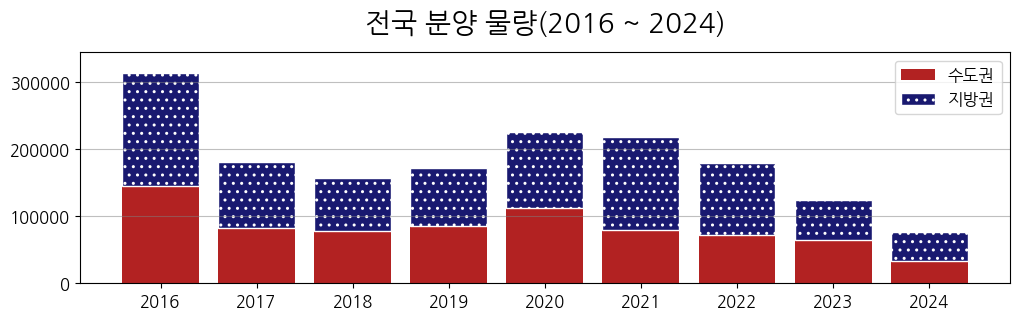

<Figure size 2000x500 with 0 Axes>

In [64]:
#3. 데이터 시각화 함수
presale_graph(data)

# 4, 5주차 KB 국민은행

## xlwings 패키지

[xlwings Github](https://github.com/xlwings/xlwings/blob/main/docs/installation.rst)

  - 엑셀에 날개를 달아준다는 패키지입니다.
  - 엑셀에서 파이썬 매크로를 사용할 때 활용합니다. 반대의 경우도 가능 파이썬에서 Visial Basic 매크로 사용
  - padas read_excel() 함수로는 열리지 않는 엑셀파일은 xlwings의 경우에는 설치된 excel을 이용해서 오픈가능
  - 엑셀파일을 파이썬 객체로 생성(객체 호출시, 엑셀파일도 자동으로 실행됨)

![서울](./data/xlwing.jpg)

### xlwings의 4가지 계층구조
1. App
2. Book
3. Sheet
4. Range

 - 엑셀 인스턴스 생성
app = xw.App(visible=False) # 엑셀 프로그램을 열지않고 파이썬에서만 인스턴스(객체)를 불러오는 visible=False라는 옵션
 - Book 목록
wb = app.Book('파일명.xlsx')
 - 첫번째 시트 읽어오기
sheet = wb.sheets[0]
 - 데이터프레임 형태로 엑셀 시트 읽어오기
df = sheet.range('A1').options(pd.DataFrame, index=False, expand='table').value
 - 인스턴스 종료
app.kill()

![xlwings](./data/appbook.png)

### xlwings 주요 기능

  df = xw.book('파일명.xlsx')
  
  - 객체 이름속성 문자열 반환
    df.name
    
  - 시트 갯수 반환
    df.sheets.count :
    
  - 시트명 문자열 반환
    df_sh1 = df.sheet(1)  
    df_sh1 = df.sheet('Sheet1')
  
  - 셀 값 출력(리스트로 반환)
    a = df_sh1['A1:A4'].value  
    print(a)
  
  - 딕셔너리 형태로 반환
  dtn = df_sh1['A1:A4'].options(dict).value  
  
  - 판다스 시리즈 형태로 반환
  sr = df_sh1[['A1:A4'].options(pd.Series).value  
  
  - 판다스 데이터프레임 형태로 반환
   df = df_sh1[['A1:A4'].options(pd.DataFrame).value

#### expand 기능

options 메서드의 expand 매개변수
매일 변동하는 표의 범위를 자동으로 인식.

expand의 인수로는 ‘down’, ‘right’, ‘table’
설정된 Range 객체의 범위를 아래쪽(‘down’) 또는 오른쪽(‘right’), 혹은 양쪽 모두(‘table’)로 확장 기능

df1 = sh1['A1:E7'].options(pd.DataFrame).value<br><br>

<span style="color:royalblue">
df2 = sh1['A1:E1'].options(pd.DataFrame, expand='down')<br>
Ctrl + Shift + 방향키 ↓를 눌러서 선택 범위를 확장한 다음 확장된 범위 내의 자료값을 데이터프레임으로 불러온다는 의미</span>

df3 = sh1['A1:A7'].options(pd.DataFrame, expand='right')<br>
Ctrl + Shift + 방향키 →를 연속으로 누른 경우

df4 = sh1['A1'].options(pd.DataFrame, expand='table')  : 표 영역 전체로 확장<br>
Ctrl + Shift + 방향키 ↓ 과 방향키 →를 연속으로 누른 경우

In [67]:
import xlwings as xw

## 2.3 KB 부동산 데이터를 가져오는 함수 정의

![kb](./data/kb.jpg)

[kb부동산 리브온](https://kbland.kr/)

In [68]:
def KB_preprocessing(path, sheet_name):
    # path : KB 데이터 엑셀 파일의 저장경로
    # sheet_name : ‘매매종합’, ‘2.매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘6.전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    app = xw.App(visible=False) # 1. App
    wb = app.books.open(path)    # 2. book
    sheet = wb.sheets[sheet_name] # 3. Sheet  
    
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range 459번째 행
    data_range = 'A2:GE' + str(row_num) # A2:GE467`
    
    df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value #시트의 범위에 해당하는 데이터 를 데이터 프레임저장
    
    #23개 만 아래 순으로 하드코딩
    statesname_list = ['서울특별시', '대구광역시', '부산광역시', '대전광역시', '광주광역시', '인천광역시', '울산광역시', '세종특별시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도','구분', '전국']
    
    states_col = list(df.columns) # 칼럼명 # 187개 값.(None 포함) 전국, 서울, 강북, 강남 등...
    small_col = list(df.iloc[0]) # 칼럼명 아래 인덱스값 187개 값(None 포함) (0, 강북구), (1, 광진구)..., 노원구 등

    for num, district_data in enumerate(small_col):
        if district_data == None: # 아래 인덱스 값이 없으면 위의 인덱스값 준용. 예를 들어 서울 전체는 아래 small_col 값이 None 이므로
            small_col[num] = states_col[num] # None 값에 "서울"을 입력

        check = num # 확인 필요칼럼 수
        while True:
            if states_col[check] in statesname_list: # 위 23개 하드코딩 리스트에 포함되면
                states_col[num] = states_col[check] # 위의 인덱스 값으로 입력 small_col 값 입력
                break
            else:
                check = check - 1 
                
# 칼럼 값 안맞는 부분 하드코딩                
    small_col[3] = '강북' #경기도 광주. 광주>경기
    states_col[129] = '경기' #경기도 광주. 광주>경기
    small_col[-3] = '' #'제주/\n서귀포'
    
    df.columns = [states_col, small_col] #  ('서울',  '강북구') 와 같은 Multi index로 묶어줌.
    new_col_data = df.drop([0,1]) # 첫번째, 두번째 줄(행) 의미없는 데이터 삭제
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

# 날짜 부분을 datetime 데이터 타입으로 변경    
    for num, raw_index in enumerate(index_list):# [86, 1]
        temp = str(raw_index).split('.') #86.1 
        if int(temp[0]) > 12 : # 월만 써있는 값 (12) 보다 큰 연도값
            if len(temp[0]) == 2: # 두자리 연도 
                new_index.append('19' + temp[0] + '.' + temp[1]) #1986.1
            else: # 4자리 연도
                new_index.append(temp[0] + '.' + temp[1]) #2000.1
        else:# (분할된 첫 숫자가 12보다 작은) 월만 있는 값
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0]) #1986.2

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [69]:
path = r'./data/202407_월간시계열.xlsx'

price_index = KB_preprocessing(path, '2.매매APT') 
jun_index = KB_preprocessing(path, '6.전세APT')

In [70]:
# 데이터 확인

In [71]:
price_index.tail() # 매매가 지수

전국      서울특별시                                              \
                   전국      서울특별시         강북        강북구        광진구        노원구   
2024-03-01  89.697577  90.307675  88.016196  87.990266  93.965479  83.491353   
2024-04-01  89.503353  90.158002   87.81936  87.611282  93.878199  83.176918   
2024-05-01  89.387179  90.129838  87.738587  87.198382  93.841061  83.029845   
2024-06-01  89.302354  90.241606  87.822147  87.047798  94.057056  82.938846   
2024-07-01  89.300558  90.746237  88.121333  86.390792  94.715624  82.407784   

                                                        ...       경상남도  \
                  도봉구       동대문구        마포구       서대문구  ...      마산합포구   
2024-03-01  82.018189  86.771601  93.067072  88.834881  ...  99.101454   
2024-04-01   81.57078  86.511359  93.165216    88.8211  ...   98.33912   
2024-05-01  81.374216  86.374008  93.450485  88.875663  ...  98.255719   
2024-06-01  81.170309  86.309522  93.817325  89.190723  ...  98.225996   
2024-07-01  80.939826  86.780978  94.794739  89.886367  ...  98.065274   

                                                                               \
                 마산회원구        성산구        의창구        진해구         양산         거제   
2024-03-01  100.796375  91.108725  95.222401  99.185181  94.200596  89.564178   
2024-04-01  100.661741  90.818188  95.052644  99.001952  93.931729  87.239499   
2024-05-01  100.621181  90.707609   94.99277  98.936463  93.797202  86.604998   
2024-06-01  100.581916  90.435973  94.897782   98.76207  93.449229  86.068242   
2024-07-01  100.422678  90.297374  94.716332  98.592894  93.271305  85.187069   

                                              
                              김해시        통영시  
2024-03-01  101.091725   91.21595  99.666628  
2024-04-01  101.003998   90.18884  99.405633  
2024-05-01  100.870971  90.112947  99.331988  
2024-06-01   100.96217  90.084596  99.139967  
2024-07-01  101.249343  89.930535  98.977033  

[5 rows x 186 columns]

In [72]:
jun_index.tail() # 전세가 지수

전국      서울특별시                                              \
                   전국      서울특별시         강북        강북구        광진구        노원구   
2024-03-01  88.805314  87.462183  87.210527  88.150877  87.510049  85.788293   
2024-04-01  88.945806  87.996113  87.793347  88.827225  87.778719  86.230731   
2024-05-01   89.04435  88.360752  88.193773  89.440573   87.96215  86.439825   
2024-06-01  89.173103  88.865973  88.751969   89.68767  88.730406   86.98606   
2024-07-01  89.338824  89.648299  89.705203  90.541615  89.781474  87.901207   

                                                        ...       경상남도  \
                  도봉구       동대문구        마포구       서대문구  ...      마산합포구   
2024-03-01   86.13873  84.438248  90.581734  92.325833  ...  96.176094   
2024-04-01  86.797545  85.172869  91.223235  93.100231  ...  95.707663   
2024-05-01  87.388277   85.50612  91.980474  93.825998  ...  95.667805   
2024-06-01   87.90334  85.696005   93.17278  94.535942  ...  95.658167   
2024-07-01  88.321455  87.108212  93.947004  95.663278  ...  95.362538   

                                                                     \
                 마산회원구        성산구        의창구         진해구         양산   
2024-03-01   99.993121  96.570339  95.248315  104.450603  90.165551   
2024-04-01  100.024757  96.489469   95.05204  104.073385  90.039665   
2024-05-01   99.837693  96.417769  95.006303  103.954214  89.974125   
2024-06-01   99.751682  96.177524  94.987832  103.844477  89.782117   
2024-07-01   99.590633  96.025206  94.591217  103.116666  89.572311   

                                                          
                   거제                    김해시         통영시  
2024-03-01  91.881976  101.618776  89.982676  101.463726  
2024-04-01  89.758139  101.537917  89.309703  101.496799  
2024-05-01  89.016875  101.451752  89.234092  101.556868  
2024-06-01  88.582879  101.054084  89.224335  101.556868  
2024-07-01  87.872703  100.865129  89.193315  101.627934  

[5 rows x 186 columns]

In [73]:
# 분석하고 싶은 지역 : 우리 동네

In [74]:
city = '서울특별시'
district = '강남구'

In [75]:
price_kr = price_index[city][district]['2010-01':]
junse_kr = jun_index[city][district]['2010-01':]
# unsold_kr = unsold[city]
# per_kr = per[city]

In [76]:
price_kr.head()

2010-01-01    60.729481
2010-02-01    60.973137
2010-03-01    61.006114
2010-04-01    60.980161
2010-05-01    60.566463
Name: 강남구, dtype: object

In [77]:
# left_index : bool    Use the index of the left DataFrame as the join key.

temp_merged = pd.merge_asof(
    price_kr, junse_kr,
    left_index=True, right_index=True, allow_exact_matches=True)
temp_merged .columns = ['강남구_매매지수', '강남구_전세지수']

In [78]:
temp_merged 

,강남구_매매지수,강남구_전세지수
2010-01-01,60.729481,49.301057
2010-02-01,60.973137,49.982587
2010-03-01,61.006114,50.244169
2010-04-01,60.980161,50.620538
2010-05-01,60.566463,50.826113
...,...,...
2024-03-01,97.107117,84.266718
2024-04-01,97.108001,84.818628
2024-05-01,97.224005,85.264161
2024-06-01,97.482532,85.547048


In [81]:
# url 생성(인허가)
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=13103871090T1+&objL1=ALL&objL2=13102871090B.0001+&objL3=13102871090C.0001+&objL4=13102871090D.0001+&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=200701&endPrdDe=202407&orgId=116&tblId=DT_MLTM_1948'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

In [82]:
df = df[['PRD_DE', 'C1_NM', 'DT']]
# df = df.pivot(index='PRD_DE', columns='C1_NM', values='DT')

In [83]:
df

,PRD_DE,C1_NM,DT
0,200701,전국,12038
1,200702,전국,29789
2,200703,전국,49827
3,200704,전국,69013
4,200705,전국,99606
...,...,...,...
4549,202402,세종,1242
4550,202403,세종,1267
4551,202404,세종,3354
4552,202405,세종,3363


In [84]:
df = df[df['C1_NM']=='서울'].reset_index(drop=True)

In [85]:
df.columns = ['시점','지역','서울_인허가물량']

In [86]:
df['서울_인허가물량'] = pd.to_numeric(df['서울_인허가물량'])
df['서울_인허가물량'] = np.where(df['시점'].str[-2:] == '01', df['서울_인허가물량'], df['서울_인허가물량'].diff()).astype(int)

# df = df.copy()
df['연'] = df['시점'].astype(str).str[:4]
df['월'] = df['시점'].astype(str).str[-2:]


df.index = df['연'] + "-" + df['월']
df.index = pd.to_datetime(df.index)

In [87]:
per_kr = df

In [88]:
per_kr

,시점,지역,서울_인허가물량,연,월
2007-01-01,200701,서울,1530,2007,01
2007-02-01,200702,서울,794,2007,02
2007-03-01,200703,서울,1888,2007,03
2007-04-01,200704,서울,1963,2007,04
2007-05-01,200705,서울,1866,2007,05
...,...,...,...,...,...
2024-02-01,202402,서울,2451,2024,02
2024-03-01,202403,서울,1541,2024,03
2024-04-01,202404,서울,666,2024,04
2024-05-01,202405,서울,3371,2024,05


In [89]:
temp_merged

,강남구_매매지수,강남구_전세지수
2010-01-01,60.729481,49.301057
2010-02-01,60.973137,49.982587
2010-03-01,61.006114,50.244169
2010-04-01,60.980161,50.620538
2010-05-01,60.566463,50.826113
...,...,...
2024-03-01,97.107117,84.266718
2024-04-01,97.108001,84.818628
2024-05-01,97.224005,85.264161
2024-06-01,97.482532,85.547048


In [90]:
temp_merged = pd.merge_asof(
    temp_merged, per_kr,
    left_index=True, right_index=True, allow_exact_matches=True)

In [91]:
temp_merged = temp_merged[['강남구_매매지수', '강남구_전세지수', '서울_인허가물량']]

In [92]:
temp_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량
2010-01-01,60.729481,49.301057,1273
2010-02-01,60.973137,49.982587,1236
2010-03-01,61.006114,50.244169,4699
2010-04-01,60.980161,50.620538,2945
2010-05-01,60.566463,50.826113,2417
...,...,...,...
2024-03-01,97.107117,84.266718,1541
2024-04-01,97.108001,84.818628,666
2024-05-01,97.224005,85.264161,3371
2024-06-01,97.482532,85.547048,2644


## [4주차] 분양물량

In [95]:
# url 생성(분양)
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=13103133605T2+&objL1=13102133605A.0001+13102133605A.0002+13102133605A.0003+&objL2=ALL&objL3=ALL&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201301&endPrdDe=202407&orgId=116&tblId=DT_MLTM_5557'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

# 출력
df

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_ID,UNIT_NM,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C2_OBJ_NM,C3_OBJ_NM,DT,C3,PRD_SE,C2,C1,C1_NM,C2_NM,C3_NM,LST_CHN_DE
0,주택건설 분양실적(공동주택),201301,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,2770,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계,2024-07-31
1,주택건설 분양실적(공동주택),201302,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,12818,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계,2024-07-31
2,주택건설 분양실적(공동주택),201303,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,14965,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계,2024-07-31
3,주택건설 분양실적(공동주택),201304,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,9983,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계,2024-07-31
4,주택건설 분양실적(공동주택),201305,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,18701,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계,2024-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,주택건설 분양실적(공동주택),202402,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,693,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계,2024-07-31
5516,주택건설 분양실적(공동주택),202403,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,693,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계,2024-07-31
5517,주택건설 분양실적(공동주택),202404,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,693,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계,2024-07-31
5518,주택건설 분양실적(공동주택),202405,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,693,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계,2024-07-31


In [96]:
df1 = df[['PRD_DE', 'C1_NM', 'C2_NM', 'C3_NM','DT']]

In [97]:
df1

,PRD_DE,C1_NM,C2_NM,C3_NM,DT
0,201301,합계,합계,순계,2770
1,201302,합계,합계,순계,12818
2,201303,합계,합계,순계,14965
3,201304,합계,합계,순계,9983
4,201305,합계,합계,순계,18701
...,...,...,...,...,...
5515,202402,지방,제주,누계,693
5516,202403,지방,제주,누계,693
5517,202404,지방,제주,누계,693
5518,202405,지방,제주,누계,693


In [98]:
df['C2_NM'].unique()

array(['합계', '소계', '서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종',
       '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [99]:
(df1['C2_NM']=='서울') & (df1['C3_NM']=='순계')

0       False
1       False
2       False
3       False
4       False
        ...  
5515    False
5516    False
5517    False
5518    False
5519    False
Length: 5520, dtype: bool

In [100]:
df1 = df1[(df1['C2_NM']=='서울') & (df1['C3_NM']=='순계')].reset_index(drop=True)

In [101]:
df1

,PRD_DE,C1_NM,C2_NM,C3_NM,DT
0,201301,수도권,서울,순계,202
1,201302,수도권,서울,순계,63
2,201303,수도권,서울,순계,252
3,201304,수도권,서울,순계,560
4,201305,수도권,서울,순계,432
...,...,...,...,...,...
133,202402,수도권,서울,순계,240
134,202403,수도권,서울,순계,45
135,202404,수도권,서울,순계,114
136,202405,수도권,서울,순계,477


In [102]:
df1.columns = ['시점','지역','시군구','합계구분','서울_분양물량']
df1['서울_분양물량'] = pd.to_numeric(df1['서울_분양물량'])
# df1['서울_분양물량'] = np.where(df1['시점'].str[-2:] == '01', df1['서울_분양물량'], df1['서울_분양물량'].diff()).astype(int)

# df1 = df1.copy()
df1['연'] = df1['시점'].astype(str).str[:4]
df1['월'] = df1['시점'].astype(str).str[-2:]


df1.index = df1['연'] + "-" + df1['월']
df1.index = pd.to_datetime(df1.index)

In [103]:
df1

,시점,지역,시군구,합계구분,서울_분양물량,연,월
2013-01-01,201301,수도권,서울,순계,202,2013,01
2013-02-01,201302,수도권,서울,순계,63,2013,02
2013-03-01,201303,수도권,서울,순계,252,2013,03
2013-04-01,201304,수도권,서울,순계,560,2013,04
2013-05-01,201305,수도권,서울,순계,432,2013,05
...,...,...,...,...,...,...,...
2024-02-01,202402,수도권,서울,순계,240,2024,02
2024-03-01,202403,수도권,서울,순계,45,2024,03
2024-04-01,202404,수도권,서울,순계,114,2024,04
2024-05-01,202405,수도권,서울,순계,477,2024,05


In [104]:
df1 = df1[['서울_분양물량']]

In [105]:
df1.index = pd.to_datetime(df1.index)
df_presale = df1

In [106]:
df_presale

,서울_분양물량
2013-01-01,202
2013-02-01,63
2013-03-01,252
2013-04-01,560
2013-05-01,432
...,...
2024-02-01,240
2024-03-01,45
2024-04-01,114
2024-05-01,477


In [107]:
temp_merged.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01'],
              dtype='datetime64[ns]', length=175, freq=None)

In [108]:
df_presale.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[ns]', length=138, freq=None)

In [109]:
temp_merged = pd.merge_asof(
    temp_merged, df_presale,
    left_index=True, right_index=True, allow_exact_matches=True)

In [110]:
temp_merged.columns = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량']
temp_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량
2010-01-01,60.729481,49.301057,1273,NaN
2010-02-01,60.973137,49.982587,1236,NaN
2010-03-01,61.006114,50.244169,4699,NaN
2010-04-01,60.980161,50.620538,2945,NaN
2010-05-01,60.566463,50.826113,2417,NaN
...,...,...,...,...
2024-03-01,97.107117,84.266718,1541,45.0
2024-04-01,97.108001,84.818628,666,114.0
2024-05-01,97.224005,85.264161,3371,477.0
2024-06-01,97.482532,85.547048,2644,662.0


In [111]:
temp_merged.isnull().sum()

강남구_매매지수     0
강남구_전세지수     0
서울_인허가물량     0
서울_분양물량     36
dtype: int64

In [112]:
temp_merged.dropna(inplace=True)

In [113]:
temp_merged

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량
2013-01-01,55.539231,61.167145,3789,202.0
2013-02-01,55.44449,61.844689,3090,63.0
2013-03-01,55.509901,62.332408,4127,252.0
2013-04-01,55.47913,62.341758,5314,560.0
2013-05-01,55.585253,62.361958,6206,432.0
...,...,...,...,...
2024-03-01,97.107117,84.266718,1541,45.0
2024-04-01,97.108001,84.818628,666,114.0
2024-05-01,97.224005,85.264161,3371,477.0
2024-06-01,97.482532,85.547048,2644,662.0


In [114]:
temp_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2013-01-01 to 2024-07-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   강남구_매매지수  139 non-null    object 
 1   강남구_전세지수  139 non-null    object 
 2   서울_인허가물량  139 non-null    int32  
 3   서울_분양물량   139 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 4.9+ KB


In [115]:
temp_merged = temp_merged.astype('float64')

In [116]:
temp_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2013-01-01 to 2024-07-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   강남구_매매지수  139 non-null    float64
 1   강남구_전세지수  139 non-null    float64
 2   서울_인허가물량  139 non-null    float64
 3   서울_분양물량   139 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB


In [117]:
US_all_index

,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
DATE,,,,,,,,,
2010-01-01,0.05,NaN,147.396,1.170764,345.0,326.25,14764.610,NaN,NaN
2010-01-02,0.05,NaN,147.396,1.170764,345.0,326.25,14764.610,NaN,456000.0
2010-01-03,0.05,NaN,147.396,1.170764,345.0,326.25,14764.610,NaN,456000.0
2010-01-04,0.12,2308.42,147.396,1.170764,345.0,326.25,14764.610,8534.2,456000.0
2010-01-05,0.12,2308.71,147.396,1.170764,345.0,326.25,14764.610,8534.2,456000.0
...,...,...,...,...,...,...,...,...,...
2024-08-11,5.33,16745.30,320.144,4.164951,617.0,664.58,28629.153,20947.5,227000.0
2024-08-12,5.33,16780.61,320.144,4.164951,617.0,664.58,28629.153,20947.5,227000.0
2024-08-13,5.33,17187.61,320.144,4.164951,617.0,664.58,28629.153,20947.5,227000.0


In [118]:
US_all_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5341 entries, 2010-01-01 to 2024-08-15
Freq: D
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DFF                   5341 non-null   float64
 1   NASDAQCOM             5338 non-null   float64
 2   CSUSHPISA             5341 non-null   float64
 3   CORESTICKM159SFRBATL  5341 non-null   float64
 4   HSN1F                 5341 non-null   float64
 5   USSTHPI               5341 non-null   float64
 6   GDP                   5341 non-null   float64
 7   WM2NS                 5338 non-null   float64
 8   ICSA                  5340 non-null   float64
dtypes: float64(9)
memory usage: 417.3 KB


In [119]:
df_merged = pd.merge_asof(
    temp_merged, US_all_index,
    left_index=True, right_index=True, allow_exact_matches=True)
df_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.823,2.065935,446.0,316.75,16648.189,10615.7,362000.0
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.781,2.143683,447.0,316.75,16648.189,10398.2,366000.0
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.960,2.096923,444.0,316.75,16648.189,10448.6,342000.0
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.932255,441.0,321.57,16728.687,10720.4,375000.0
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.849,1.905048,428.0,321.57,16728.687,10531.7,331000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,97.107117,84.266718,1541.0,45.0,5.33,16274.94,318.308,4.509212,683.0,664.58,28269.174,20703.1,213000.0
2024-04-01,97.108001,84.818628,666.0,114.0,5.33,16396.83,319.326,4.412395,730.0,664.58,28629.153,21122.6,222000.0
2024-05-01,97.224005,85.264161,3371.0,477.0,5.33,15605.48,320.144,4.302023,621.0,664.58,28629.153,20767.5,209000.0
2024-06-01,97.482532,85.547048,2644.0,662.0,5.33,16735.02,320.144,4.226876,617.0,664.58,28629.153,20792.2,229000.0


In [120]:
# df_merged.dropna(inplace=True)
# df_merged

In [121]:
# df_merged = df_merged.drop(columns=['수도권_분양물량','SP500']).fillna(method='backfill')
# df_merged

## [4주차] Target Y 강남구 매매가 데이터 수집 
분양예측_데이터 전처리(pickle), 모델링(Regression, LSTM)

In [213]:
def KB_gangnam_price(path, sheet_name):
    
    app = xw.App(visible=False) # 1. App
    wb = app.books.open(path)    # 2. book
    sheet = wb.sheets[sheet_name] # 3. Sheet  
    
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range
    data_range = 'A2:BM' + str(row_num)
    
    df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    df_gangnam = df.iloc[2:,[0,14]].reset_index(drop=True)
    df_gangnam.dropna(axis=0, inplace=True)    
    df_gangnam[None].astype(int)
    
    index_list = list(df_gangnam['규모']) #날짜
    new_index = []
    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if "'" in temp[0] :
            new_index.append('20' + temp[0][1:] + '.' + temp[1])
        else:
            if int(temp[0])<13:
                new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0]) #1 ->2024.1
            else :
                new_index.append(temp[0] + '.' + temp[1]) #2024.1
    
    df_gangnam.index= pd.to_datetime(new_index)
    df_gangnam[None] = df_gangnam[None].astype(int)
    del df_gangnam['규모']
    df_gangnam.columns = ['gangnam_price(만원)']
    
    return df_gangnam

In [123]:
path = r'./data/202407_월간시계열.xlsx'
df_gangnam = KB_gangnam_price(path, '41.평균매매') 

*이하 교육용 line by line

In [124]:
df_gangnam

,gangnam_price(만원)
2008-12-01,62363
2009-01-01,61497
2009-02-01,61630
2009-03-01,61520
2009-04-01,61930
...,...
2023-03-01,144230
2023-04-01,144327
2023-05-01,144633
2023-06-01,145226


---

In [173]:
path = './data/202407_월간시계열.xlsx'
sheet_name = '41.평균매매'

In [174]:
path

'./data/202407_월간시계열.xlsx'

In [175]:
sheet_name

'41.평균매매'

In [176]:
app = xw.App(visible=False) # 1. App
wb = app.books.open(path)    # 2. book
sheet = wb.sheets[sheet_name] # 3. Sheet  

In [177]:
row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range
data_range = 'A2:BM' + str(row_num)

In [178]:
row_num

197

In [179]:
df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
df

,규모,전국 Total,None,None,None,서울특별시 Seoul,None,None,None,강북14개구 Northern seoul,...,전라남도 Jeonnam,None,경상북도 Gyungbuk,None,경상남도 Gyungnam,None,기타지방 Non Metropolitan Area,None,None,None
0,None,종합,아파트,단독,연립,종합,아파트,단독,연립,종합,...,종합,아파트,종합,아파트,종합,아파트,종합,아파트,단독,연립
1,년도,Total,Apartments,Detached houses,Row Houses,Total,Apartments,Detached houses,Row Houses,Total,...,Total,Apartments,Total,Apartments,Total,Apartments,Total,Apartments,Detached houses,Row Houses
2,'08.12,24209.343341,25060.733658,26987.80417,14629.383143,45986.177653,52529.555997,56296.005569,23275.561643,37453.720926,...,-,-,-,-,-,-,10796.468928,10234.568332,12361.302861,5368.987586
3,'09.1,24015.559276,24803.524004,26919.866476,14529.214367,45588.465308,51924.635389,56176.137783,23111.327192,37255.837945,...,-,-,-,-,-,-,10763.215943,10205.19263,12323.800625,5351.977568
4,2.0,23962.799429,24722.389691,26939.632365,14487.22694,45593.126725,51905.434317,56298.185807,23074.248737,37191.745222,...,-,-,-,-,-,-,10739.04542,10178.852202,12313.970337,5306.839653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3.0,44612.999505,50018.839847,45179.64488,21432.09912,89913.639949,119567.5904,110468.102891,32879.610118,74377.265407,...,17525.586384,19039.807628,18308.781158,19117.989355,23949.729138,24624.989503,22786.8456,23322.152166,25072.265078,9974.014108
191,4.0,44599.672806,49988.095974,45183.470253,21433.300335,89950.998466,119598.063009,110501.897675,32898.277137,74319.156396,...,17552.279731,19089.575446,18216.200141,18997.191813,23897.760182,24557.656999,22768.313839,23295.504558,25069.678751,9964.033436
192,5.0,44623.62298,49983.551739,45348.348707,21409.019715,90065.689204,119773.02497,110486.240246,32899.161623,74315.074189,...,17792.171793,19174.332135,18198.730348,18972.838013,23900.916522,24530.045671,22820.020425,23288.980774,25327.846807,9958.400415
193,6.0,44686.008992,50063.429955,45363.402138,21401.972644,90348.186405,120217.564895,110492.614292,32902.084698,74474.248889,...,17840.358444,19238.536272,18182.892525,18951.134406,23868.105322,24492.59902,22820.345263,23280.308707,25355.602587,9958.859336


In [180]:
df.iloc[2:20]

,규모,전국 Total,None,None,None,서울특별시 Seoul,None,None,None,강북14개구 Northern seoul,...,전라남도 Jeonnam,None,경상북도 Gyungbuk,None,경상남도 Gyungnam,None,기타지방 Non Metropolitan Area,None,None,None
2,'08.12,24209.343341,25060.733658,26987.80417,14629.383143,45986.177653,52529.555997,56296.005569,23275.561643,37453.720926,...,-,-,-,-,-,-,10796.468928,10234.568332,12361.302861,5368.987586
3,'09.1,24015.559276,24803.524004,26919.866476,14529.214367,45588.465308,51924.635389,56176.137783,23111.327192,37255.837945,...,-,-,-,-,-,-,10763.215943,10205.19263,12323.800625,5351.977568
4,2.0,23962.799429,24722.389691,26939.632365,14487.22694,45593.126725,51905.434317,56298.185807,23074.248737,37191.745222,...,-,-,-,-,-,-,10739.04542,10178.852202,12313.970337,5306.839653
5,3.0,23914.255611,24636.256944,26970.644384,14474.291626,45536.644063,51766.062233,56437.454767,23043.166539,37152.132369,...,-,-,-,-,-,-,10729.029675,10175.393413,12300.740829,5310.193942
6,4.0,23957.07885,24672.873592,27043.912487,14477.620244,45725.098322,51993.440585,56771.54414,23028.767231,37299.178183,...,-,-,-,-,-,-,10731.556477,10177.11168,12304.144871,5313.088154
7,5.0,23996.435927,24724.382248,27065.987363,14486.443344,45793.158157,52103.526034,56803.395343,23033.2843,37307.724347,...,-,-,-,-,-,-,10730.609095,10177.09262,12301.697193,5321.575425
8,6.0,24076.382932,24808.750718,27143.201393,14531.793594,46063.682403,52412.523358,57212.355107,23107.735546,37384.887212,...,-,-,-,-,-,-,10739.354493,10183.851975,12312.663915,5329.497907
9,7.0,24184.582562,24953.179477,27179.15009,14580.670804,46425.908067,52935.096455,57432.865353,23230.378915,37589.756572,...,-,-,-,-,-,-,10737.39014,10184.141038,12307.286632,5336.388751
10,8.0,24266.837719,25046.334447,27239.479274,14640.072732,46652.860994,53211.404255,57662.197206,23346.619183,37744.469881,...,-,-,-,-,-,-,10750.465762,10204.093517,12304.820706,5361.915196
11,9.0,24458.706659,25255.520755,27407.33321,14771.484136,47158.90541,53790.66825,58288.374257,23594.70346,38109.214068,...,-,-,-,-,-,-,10786.757615,10248.762463,12332.574279,5390.827816


In [181]:
df_gangnam = df.iloc[2:,[0,14]].reset_index(drop=True)

In [182]:
df_gangnam

,규모,None
0,'08.12,62363.678608
1,'09.1,61497.963057
2,2.0,61630.555507
3,3.0,61520.993798
4,4.0,61930.629342
...,...,...
188,3.0,144230.112078
189,4.0,144327.857564
190,5.0,144633.479901
191,6.0,145226.350818


In [183]:
df_gangnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   규모      193 non-null    object
 1   None    188 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [184]:
# df_gangnam.index= pd.to_datetime(df_gangnam.index)

In [185]:
df_gangnam[None].tail(20)

173    150815.708018
174    147864.808782
175    146235.256642
176    144688.948863
177    143547.231931
178    141654.400192
179    141631.513114
180    141896.465162
181    142613.264447
182    143692.968001
183    144485.481747
184    144875.672359
185    144755.629039
186    144480.020159
187     144389.04443
188    144230.112078
189    144327.857564
190    144633.479901
191    145226.350818
192    146923.593218
dtype: object

In [186]:
df_gangnam.dropna(axis=0, inplace=True)

In [187]:
df_gangnam.tail(20)

,규모,None
173,12.0,150815.708018
174,'23.1,147864.808782
175,2.0,146235.256642
176,3.0,144688.948863
177,4.0,143547.231931
178,5.0,141654.400192
179,6.0,141631.513114
180,7.0,141896.465162
181,8.0,142613.264447
182,9.0,143692.968001


In [188]:
df_gangnam[None].astype(int)

0       62363
1       61497
2       61630
3       61520
4       61930
        ...  
188    144230
189    144327
190    144633
191    145226
192    146923
Length: 188, dtype: int32

## 연습문제(Exercise) String으로 된 날짜 파싱하기

In [189]:
index_list = list(df_gangnam['규모'])
index_list

["'08.12",
 "'09.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'10.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'11.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'12.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'13.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'14.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'15.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'16.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'17.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'18.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'19.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'20.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'21.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 

In [190]:
for num, raw_index in enumerate(index_list):
    print(num, raw_index)

0 '08.12
1 '09.1
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 10.0
11 11.0
12 12.0
13 '10.1
14 2.0
15 3.0
16 4.0
17 5.0
18 6.0
19 7.0
20 8.0
21 9.0
22 10.0
23 11.0
24 12.0
25 '11.1
26 2.0
27 3.0
28 4.0
29 5.0
30 6.0
31 7.0
32 8.0
33 9.0
34 10.0
35 11.0
36 12.0
37 '12.1
38 2.0
39 3.0
40 4.0
41 5.0
42 6.0
43 7.0
44 8.0
45 9.0
46 10.0
47 11.0
48 12.0
49 '13.1
50 2.0
51 3.0
52 4.0
53 5.0
54 6.0
55 7.0
56 8.0
57 9.0
58 10.0
59 11.0
60 12.0
61 '14.1
62 2.0
63 3.0
64 4.0
65 5.0
66 6.0
67 7.0
68 8.0
69 9.0
70 10.0
71 11.0
72 12.0
73 '15.1
74 2.0
75 3.0
76 4.0
77 5.0
78 6.0
79 7.0
80 8.0
81 9.0
82 10.0
83 11.0
84 12.0
85 '16.1
86 2.0
87 3.0
88 4.0
89 5.0
90 6.0
91 7.0
92 8.0
93 9.0
94 10.0
95 11.0
96 12.0
97 '17.1
98 2.0
99 3.0
100 4.0
101 5.0
102 6.0
103 7.0
104 8.0
105 9.0
106 10.0
107 11.0
108 12.0
109 '18.1
110 2.0
111 3.0
112 4.0
113 5.0
114 6.0
115 7.0
116 8.0
117 9.0
118 10.0
119 11.0
120 12.0
121 '19.1
122 2.0
123 3.0
124 4.0
125 5.0
126 6.0
127 7.0
128 8.0
129 9.0
130 10.0
131 11

In [191]:
new_index = []

for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if "'" in temp[0] :
        new_index.append('20' + temp[0][1:] + '.' + temp[1])
    else:
        if int(temp[0])<13:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0]) #1 ->2024.1
        else :
            new_index.append(temp[0] + '.' + temp[1]) #2024.1

In [192]:
new_index

['2008.12',
 '2009.1',
 '2009.2',
 '2009.3',
 '2009.4',
 '2009.5',
 '2009.6',
 '2009.7',
 '2009.8',
 '2009.9',
 '2009.10',
 '2009.11',
 '2009.12',
 '2010.1',
 '2010.2',
 '2010.3',
 '2010.4',
 '2010.5',
 '2010.6',
 '2010.7',
 '2010.8',
 '2010.9',
 '2010.10',
 '2010.11',
 '2010.12',
 '2011.1',
 '2011.2',
 '2011.3',
 '2011.4',
 '2011.5',
 '2011.6',
 '2011.7',
 '2011.8',
 '2011.9',
 '2011.10',
 '2011.11',
 '2011.12',
 '2012.1',
 '2012.2',
 '2012.3',
 '2012.4',
 '2012.5',
 '2012.6',
 '2012.7',
 '2012.8',
 '2012.9',
 '2012.10',
 '2012.11',
 '2012.12',
 '2013.1',
 '2013.2',
 '2013.3',
 '2013.4',
 '2013.5',
 '2013.6',
 '2013.7',
 '2013.8',
 '2013.9',
 '2013.10',
 '2013.11',
 '2013.12',
 '2014.1',
 '2014.2',
 '2014.3',
 '2014.4',
 '2014.5',
 '2014.6',
 '2014.7',
 '2014.8',
 '2014.9',
 '2014.10',
 '2014.11',
 '2014.12',
 '2015.1',
 '2015.2',
 '2015.3',
 '2015.4',
 '2015.5',
 '2015.6',
 '2015.7',
 '2015.8',
 '2015.9',
 '2015.10',
 '2015.11',
 '2015.12',
 '2016.1',
 '2016.2',
 '2016.3',
 '2016.4',

In [193]:
df_gangnam.index= pd.to_datetime(new_index)

In [194]:
df_gangnam[None] = df_gangnam[None].astype(int)

In [195]:
del df_gangnam['규모']

In [196]:
df_gangnam.columns = ['gangnam_price(만원)']

In [197]:
df_gangnam

,gangnam_price(만원)
2008-12-01,62363
2009-01-01,61497
2009-02-01,61630
2009-03-01,61520
2009-04-01,61930
...,...
2024-03-01,144230
2024-04-01,144327
2024-05-01,144633
2024-06-01,145226


---

## Target Y 값 수집완성

In [198]:
df_merged = pd.merge_asof(
    df_merged, df_gangnam,
    left_index=True, right_index=True, allow_exact_matches=True)
df_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.823,2.065935,446.0,316.75,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.781,2.143683,447.0,316.75,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.960,2.096923,444.0,316.75,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.932255,441.0,321.57,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.849,1.905048,428.0,321.57,16728.687,10531.7,331000.0,57403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,97.107117,84.266718,1541.0,45.0,5.33,16274.94,318.308,4.509212,683.0,664.58,28269.174,20703.1,213000.0,144230
2024-04-01,97.108001,84.818628,666.0,114.0,5.33,16396.83,319.326,4.412395,730.0,664.58,28629.153,21122.6,222000.0,144327
2024-05-01,97.224005,85.264161,3371.0,477.0,5.33,15605.48,320.144,4.302023,621.0,664.58,28629.153,20767.5,209000.0,144633
2024-06-01,97.482532,85.547048,2644.0,662.0,5.33,16735.02,320.144,4.226876,617.0,664.58,28629.153,20792.2,229000.0,145226


In [199]:
df = df_merged 

In [203]:
train = df[df.index < pd.to_datetime('2021-12-31')]
test = df[df.index > pd.to_datetime('2021-12-31')]

In [204]:
df.columns

Index(['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price(만원)'],
      dtype='object')

In [205]:
feature_names = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA'] # X

target = 'gangnam_price(만원)' #y

# y = ax + b 의 형태

X_train = train[feature_names]
X_test = test[feature_names]

y_train = train[target]
y_test = test[target]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(108, 13)
(108,)
(31, 13)
(31,)


In [206]:
X_train

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.823,2.065935,446.0,316.75,16648.189,10615.7,362000.0
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.781,2.143683,447.0,316.75,16648.189,10398.2,366000.0
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.960,2.096923,444.0,316.75,16648.189,10448.6,342000.0
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.932255,441.0,321.57,16728.687,10720.4,375000.0
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.849,1.905048,428.0,321.57,16728.687,10531.7,331000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,95.283593,97.623798,4597.0,201.0,0.07,14672.68,266.594,2.332419,691.0,539.24,23828.973,20522.0,381000.0
2021-09-01,96.429728,98.355783,11878.0,1921.0,0.08,15309.38,270.175,2.610662,731.0,539.24,23828.973,20783.5,353000.0
2021-10-01,97.412160,98.816228,8062.0,77.0,0.08,14566.70,273.543,3.007604,683.0,557.79,24654.603,20835.9,369000.0
2021-11-01,98.859544,99.562264,7421.0,114.0,0.08,15595.92,277.260,3.184384,787.0,557.79,24654.603,21173.4,261000.0


In [207]:
y_train.to_frame()

,gangnam_price(만원)
2013-01-01,59892
2013-02-01,59568
2013-03-01,59440
2013-04-01,57388
2013-05-01,57403
...,...
2021-08-01,139403
2021-09-01,142980
2021-10-01,144865
2021-11-01,147325


In [209]:
import pickle
with open( "./data/월별부동산데이터_2024", "wb" ) as file:
    pickle.dump(df, file)

In [210]:
#####################################################################

In [211]:
with open("./data/월별부동산데이터_2024", "rb" ) as file:
    df = pickle.load(file)

In [212]:
df.shape

(139, 14)

-----------

이하 설명

In [214]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [215]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

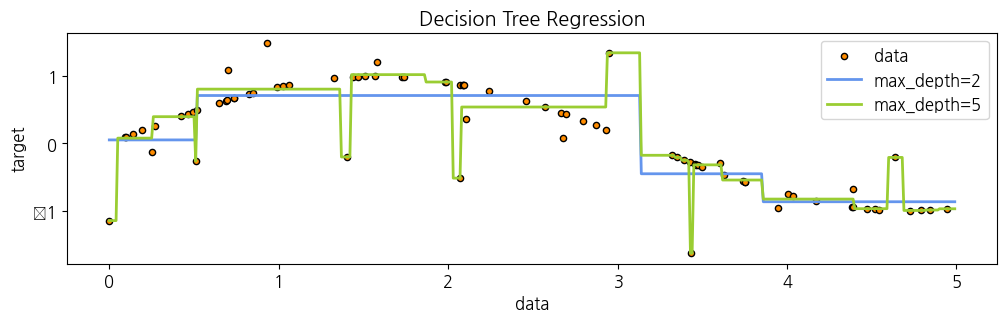

In [216]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


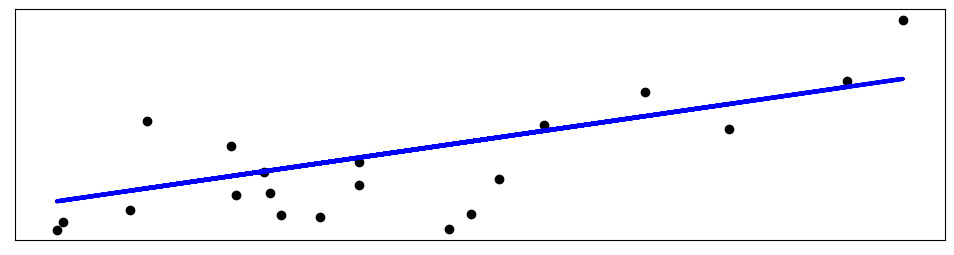

In [217]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

*Next Lecture : [5주차] 2023 머신러닝(ML), 딥러닝(DL) 문제해결 프로세스.ipynb*

In [218]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2013-01-01 to 2024-07-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   강남구_매매지수              139 non-null    float64
 1   강남구_전세지수              139 non-null    float64
 2   서울_인허가물량              139 non-null    float64
 3   서울_분양물량               139 non-null    float64
 4   DFF                   139 non-null    float64
 5   NASDAQCOM             139 non-null    float64
 6   CSUSHPISA             139 non-null    float64
 7   CORESTICKM159SFRBATL  139 non-null    float64
 8   HSN1F                 139 non-null    float64
 9   USSTHPI               139 non-null    float64
 10  GDP                   139 non-null    float64
 11  WM2NS                 139 non-null    float64
 12  ICSA                  139 non-null    float64
 13  gangnam_price(만원)     139 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 15.7 KB


In [219]:
df_merged.columns

Index(['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price(만원)'],
      dtype='object')

In [220]:
df_merged['time'] = df_merged.index

<AxesSubplot: >

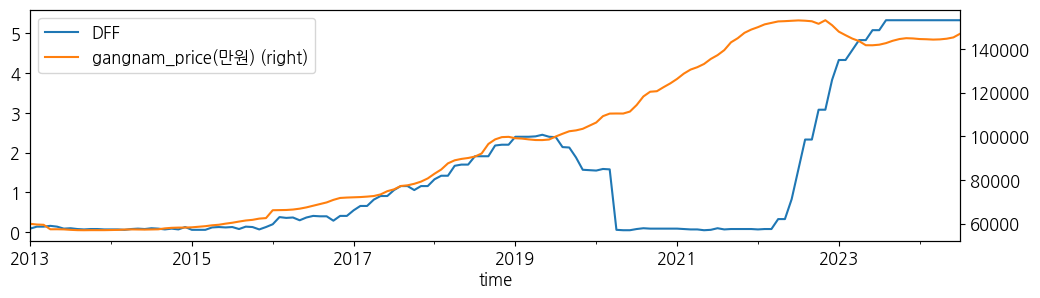

In [221]:
ax = df_merged.plot('time','DFF')
df_merged.plot('time','gangnam_price(만원)',secondary_y=True, ax=ax)

In [222]:
col = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS', 'ICSA']
# CORESTICKM159SFRBATL : Sticky Price Consumer Price Index less Food and Energy 고정 가격 소비자 물가 지수 - 식품 및 에너지

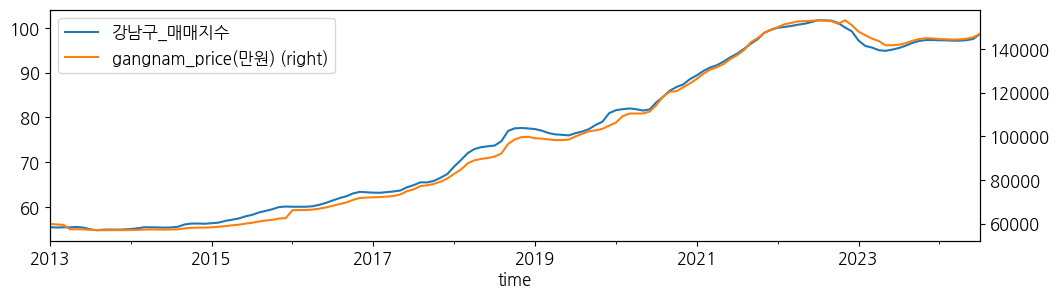

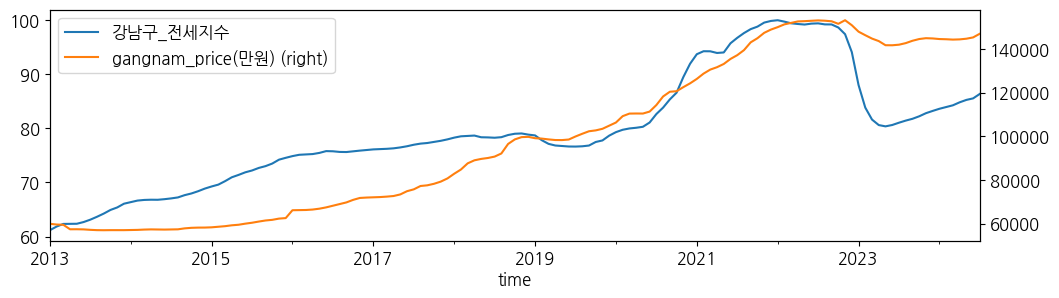

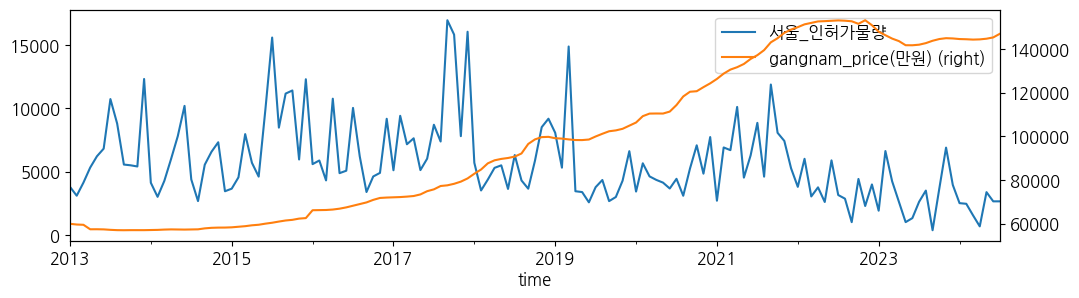

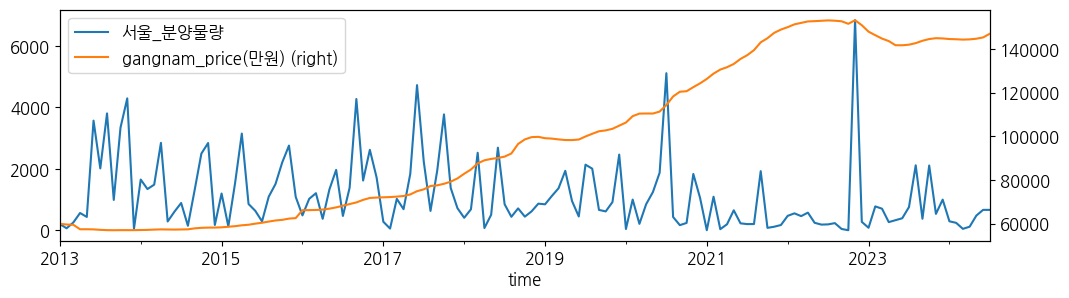

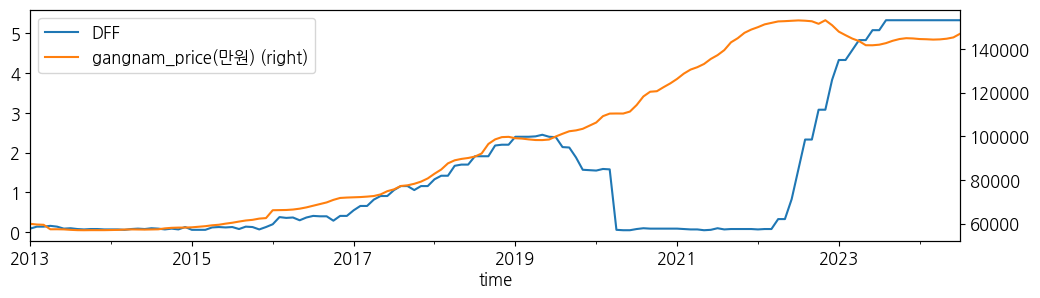

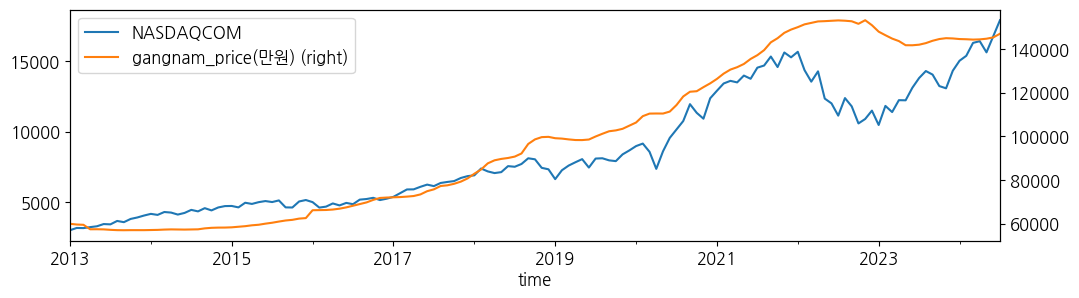

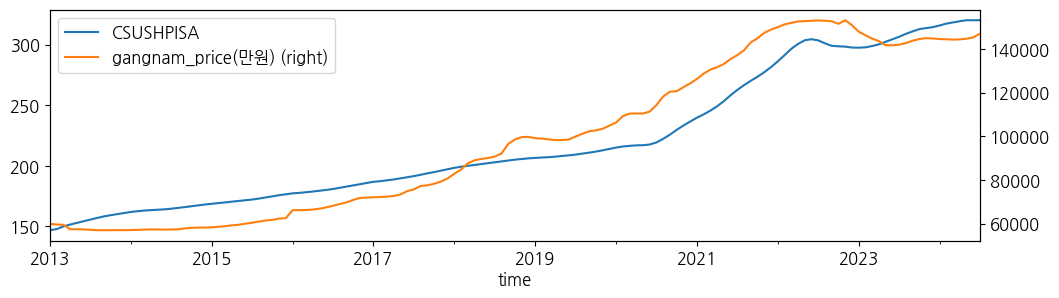

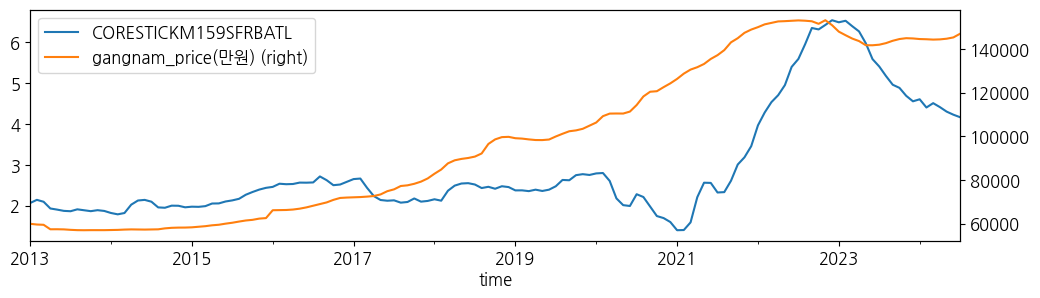

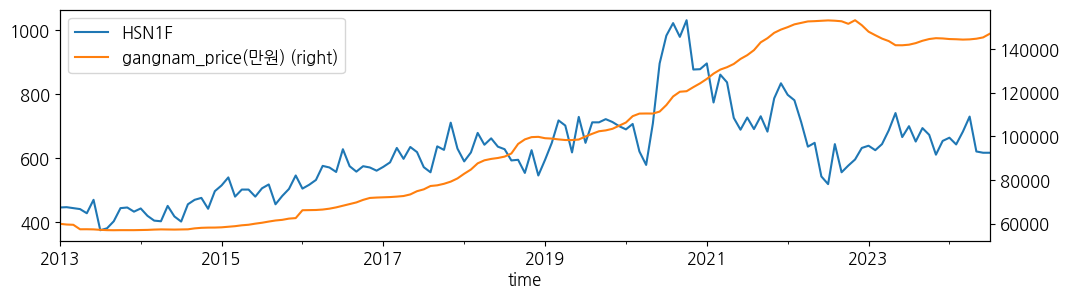

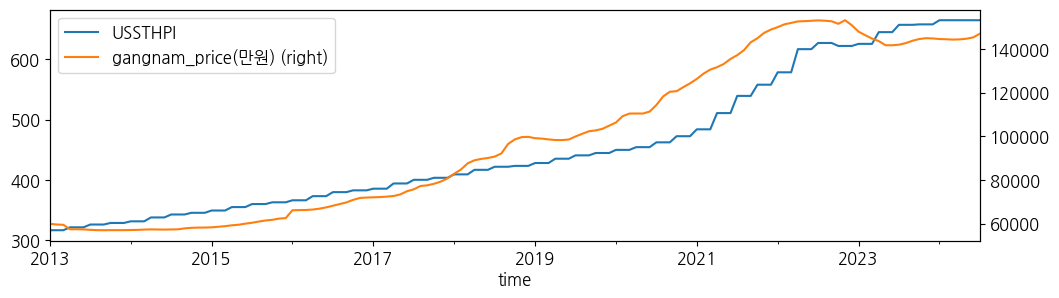

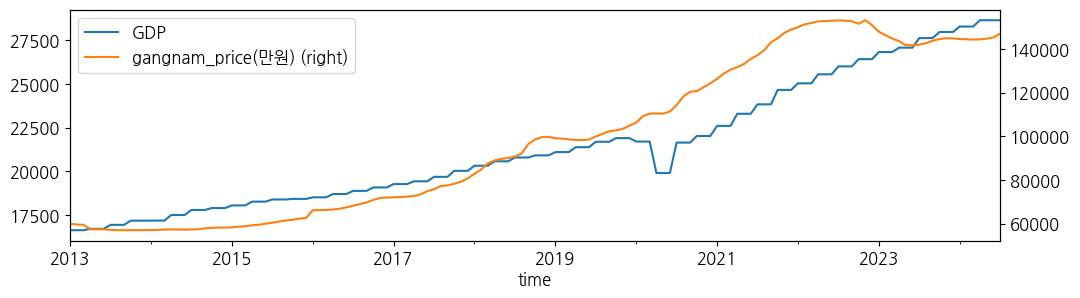

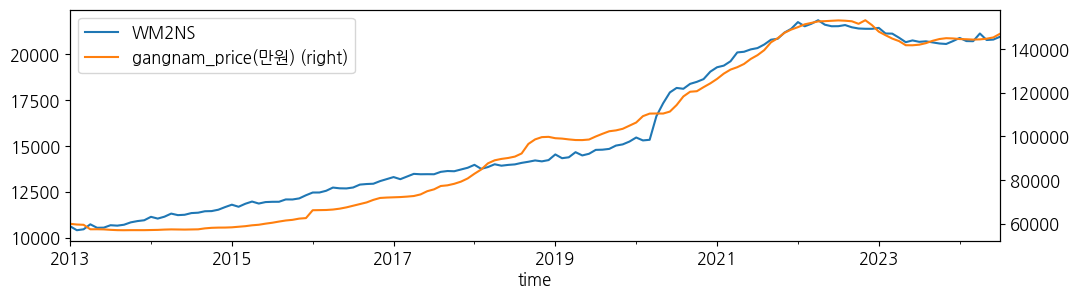

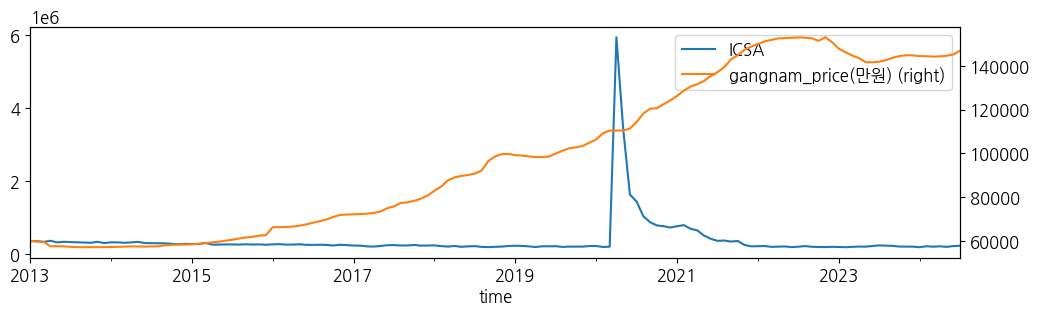

In [223]:
for x in col:
    ax = df_merged.plot('time',x )
    df_merged.plot('time','gangnam_price(만원)',secondary_y=True, ax=ax)

## 다중공선성(multicollinearity)

종속변수(Y)에 영향을 주는 독립변수(X_1, X_2, X_3 ...)들이 서로 다른 독립 변수(X_1, X_2, X_3 ...)에 영향을 주는 경우  
독립 변수들이 서로 독립이 아니라, 서로 상호간의 상관관계가 강한 경우를 말한다.

=> 여기에 맞는 모델을 사용한다.Ridge / Lasso / ElasticNet

[참고블로그](https://velog.io/@cha-suyeon/%ED%98%BC%EA%B3%B5%EB%A8%B8-feature-engineering-%EB%8B%A4%EC%A4%91-%ED%9A%8C%EA%B7%80)

<Figure size 1500x1500 with 0 Axes>

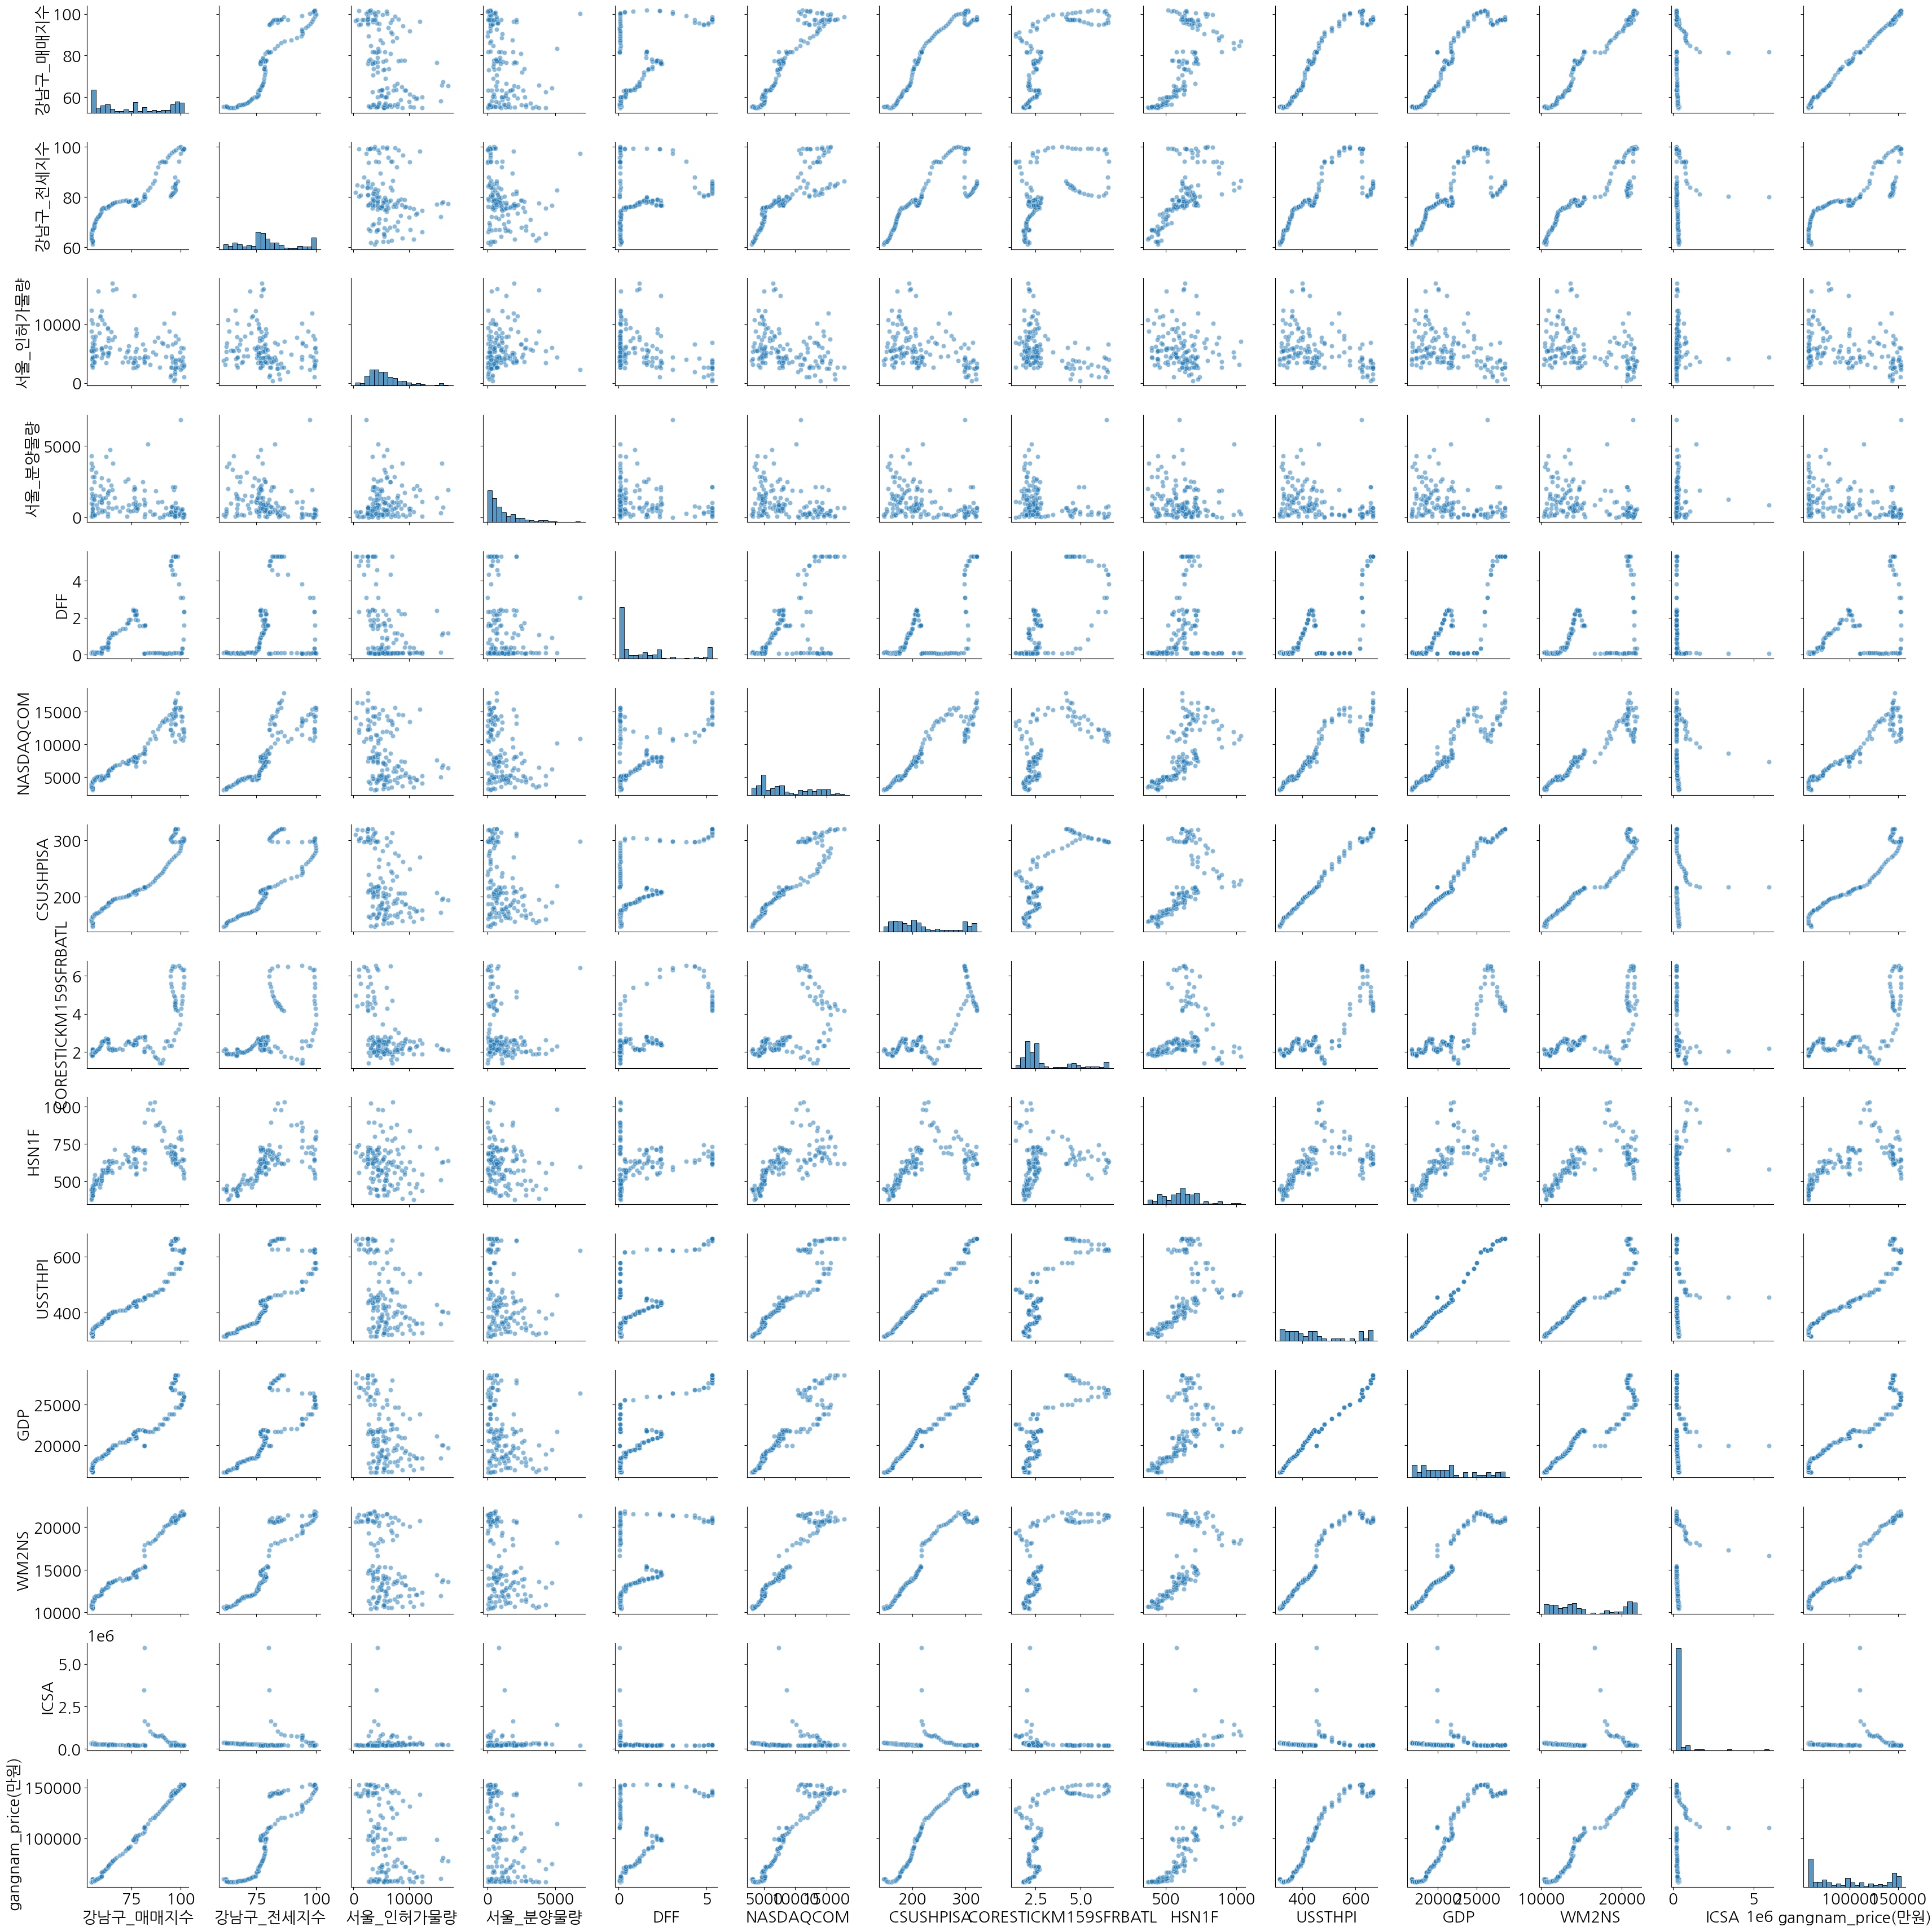

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# 플롯의 크기를 조절
plt.figure(figsize=(15, 15))
plt.rc('font', size=20)

# pairplot 그리기
sns.pairplot(df_merged, 
#              diag_kind='kde',
#              hue="species",
#              palette='bright',
             plot_kws={'alpha': 0.5}, 
             diag_kws={'bins': 20})

# x 축과 y 축 이름의 크기를 크게 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 그래프 표시
plt.show()